<img width="400" src="https://nomeroff.net.ua/images/logo/nomeroff_net.svg" alt="Nomeroff Net. Automatic numberplate recognition system" align="left"/>

## The example demonstrates license plate number detection.

In [1]:
import os
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt

current_dir = os.path.dirname("./")
nomeroff_net_dir = os.path.join(current_dir, "../../../")
sys.path.append(nomeroff_net_dir)

from nomeroff_net import pipeline
from nomeroff_net.tools import unzip


2024-12-03 08:59:31.447290: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-03 08:59:31.485209: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-03 08:59:31.485241: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-03 08:59:31.485270: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-03 08:59:31.492608: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: A

In [3]:
number_plate_detection_and_reading = pipeline("number_plate_detection_and_reading",
                                              path_to_model="modelhub://yolov11x_brand_np",
                                              image_loader="opencv")

WARNING ⚠️ Python>=3.10 is required, but Python==3.9.18 is currently installed 


/home/dmitro/.local/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/dmitro/.local/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B2_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/home/dmitro/.local/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DE

In [4]:
result = number_plate_detection_and_reading([
    os.path.join(nomeroff_net_dir, './data/examples/brand_np/empty_numberplate.jpeg'),
    os.path.join(nomeroff_net_dir, './data/examples/brand_np/filled_numberplate.jpeg'),
    os.path.join(nomeroff_net_dir, './data/examples/brand_np/brand_numberplate.jpeg'),
    os.path.join(nomeroff_net_dir, './data/examples/oneline_images/example1.jpeg'),
])

/mnt/var/www/projects_computer_vision/nomeroff-net/tutorials/ju/inference/./../../../nomeroff_net/nnmodels/numberplate_options_model.py:136: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x1 = functional.softmax(x1)
/mnt/var/www/projects_computer_vision/nomeroff-net/tutorials/ju/inference/./../../../nomeroff_net/nnmodels/numberplate_options_model.py:137: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x2 = functional.softmax(x2)
/mnt/var/www/projects_computer_vision/nomeroff-net/tutorials/ju/inference/./../../../nomeroff_net/pipes/number_plate_text_readers/base/ocr.py:261: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:275.)
  pred_text

In [5]:
(images, images_bboxs, 
 images_points, images_zones, region_ids, 
 region_names, count_lines, 
 confidences, texts) = unzip(result)

[[40.0, 211.0, 102.0, 225.0, 0.86015195, 0, array([[     40.252,      225.03],
       [     39.883,      211.08],
       [     101.55,      210.97],
       [     101.66,      224.37]], dtype=float32)]]


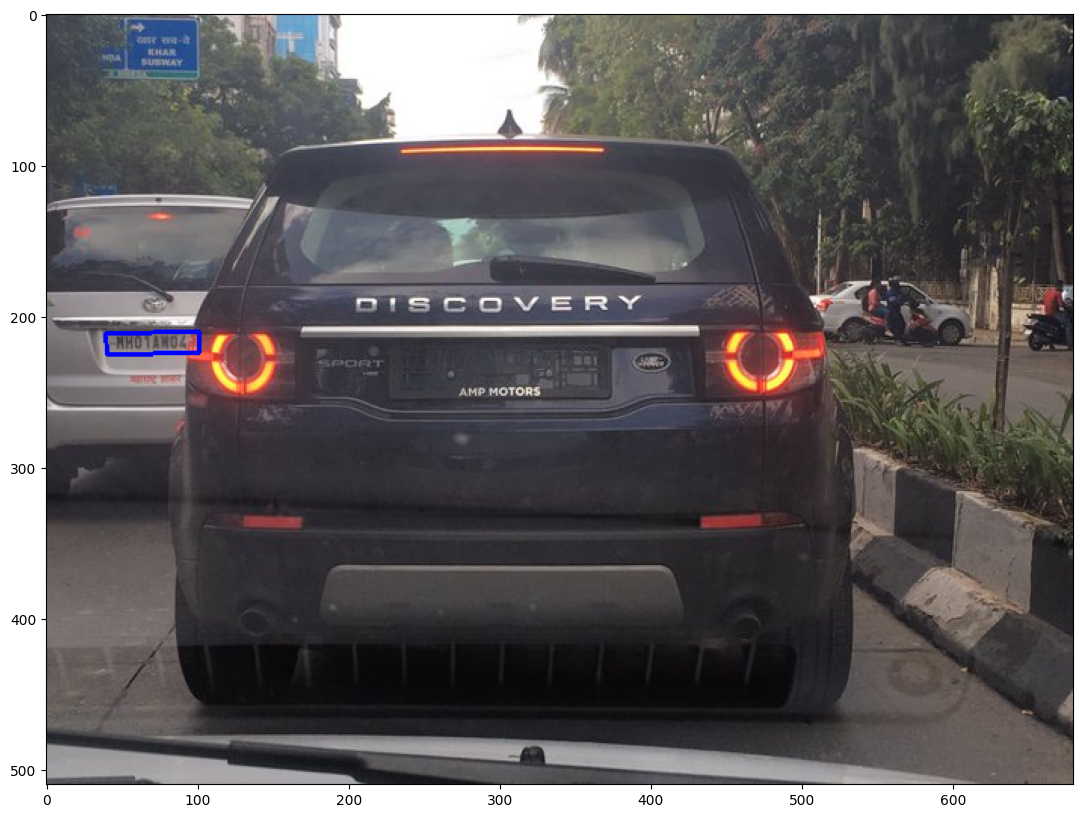

[[1105.0, 683.0, 1294.0, 757.0, 0.8955001, 2, array([[       1109,       755.7],
       [     1108.1,      692.21],
       [     1290.8,      684.07],
       [     1292.3,      745.95]], dtype=float32)]]


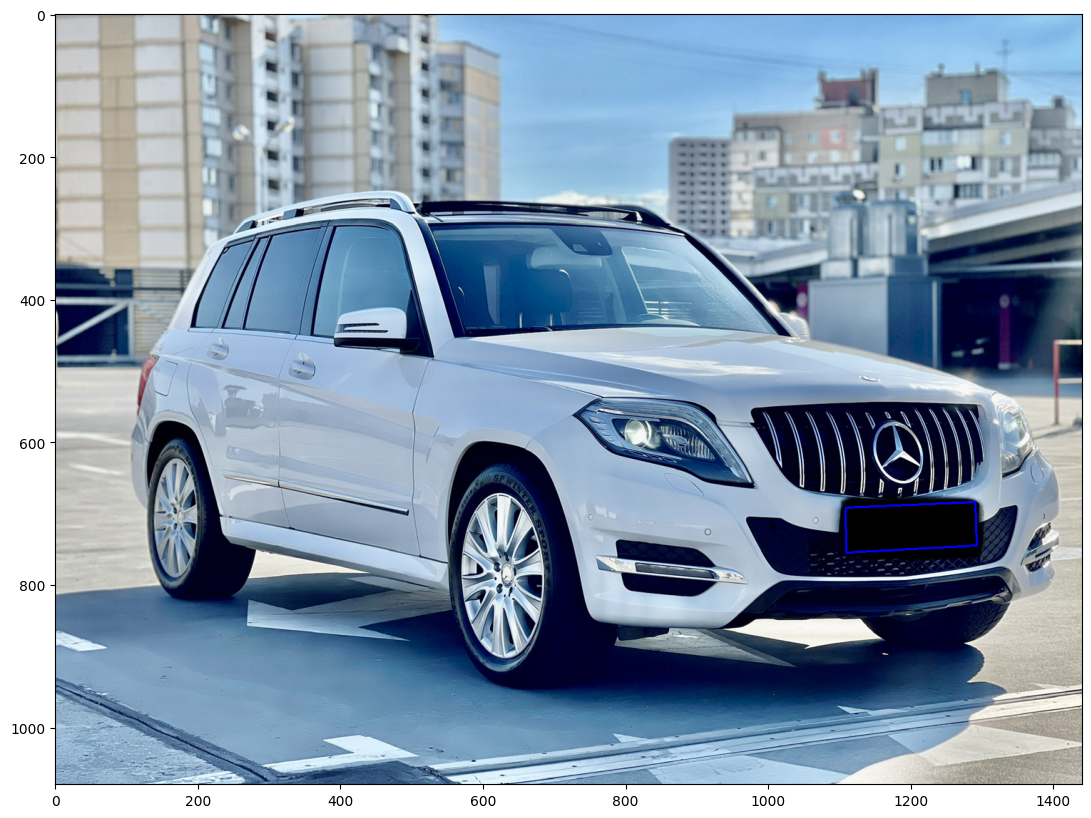

[[480.0, 689.0, 756.0, 755.0, 0.9384445, 1, array([[     478.84,      744.84],
       [     479.21,      689.06],
       [     755.17,      698.89],
       [     755.39,      755.23]], dtype=float32)]]


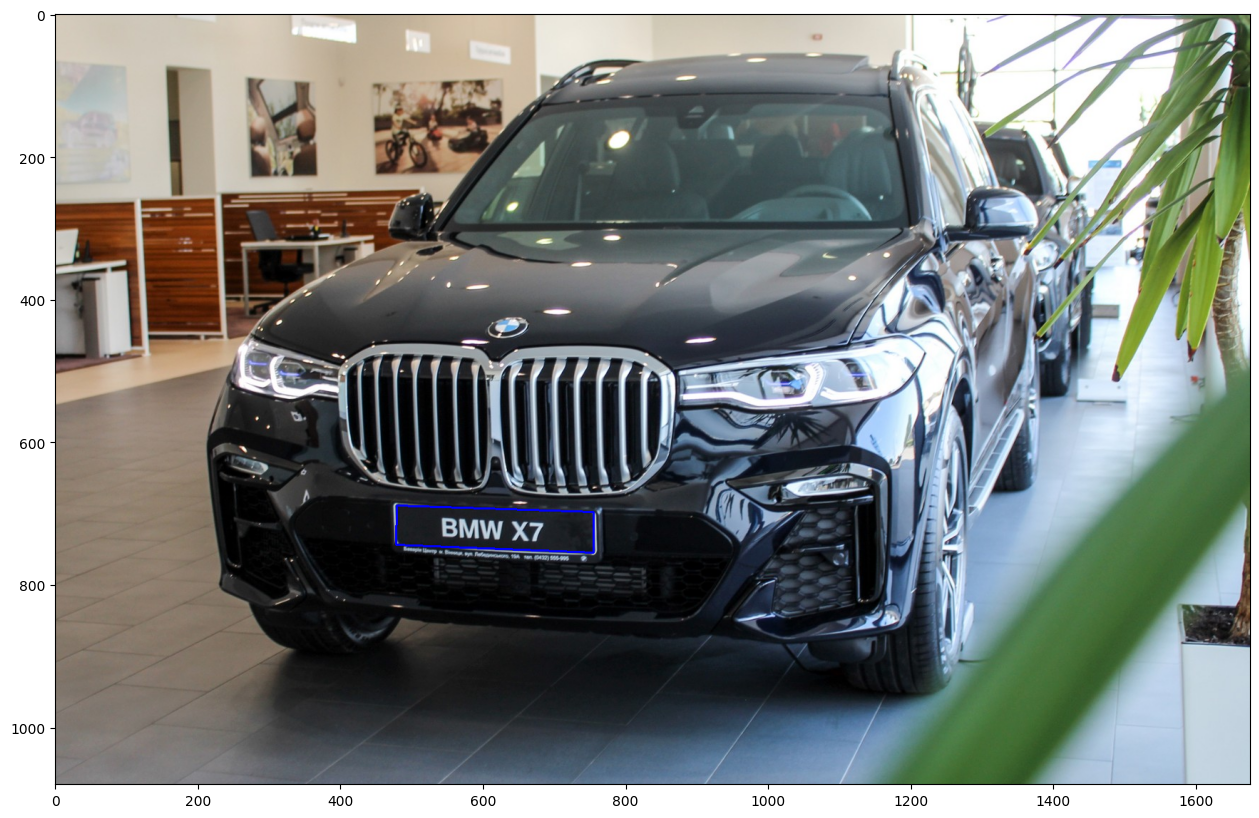

[[872.0, 463.0, 1087.0, 574.0, 0.9474753, 0, array([[     873.23,      573.01],
       [     872.65,      510.36],
       [     1085.8,      462.81],
       [     1085.5,      520.05]], dtype=float32)]]


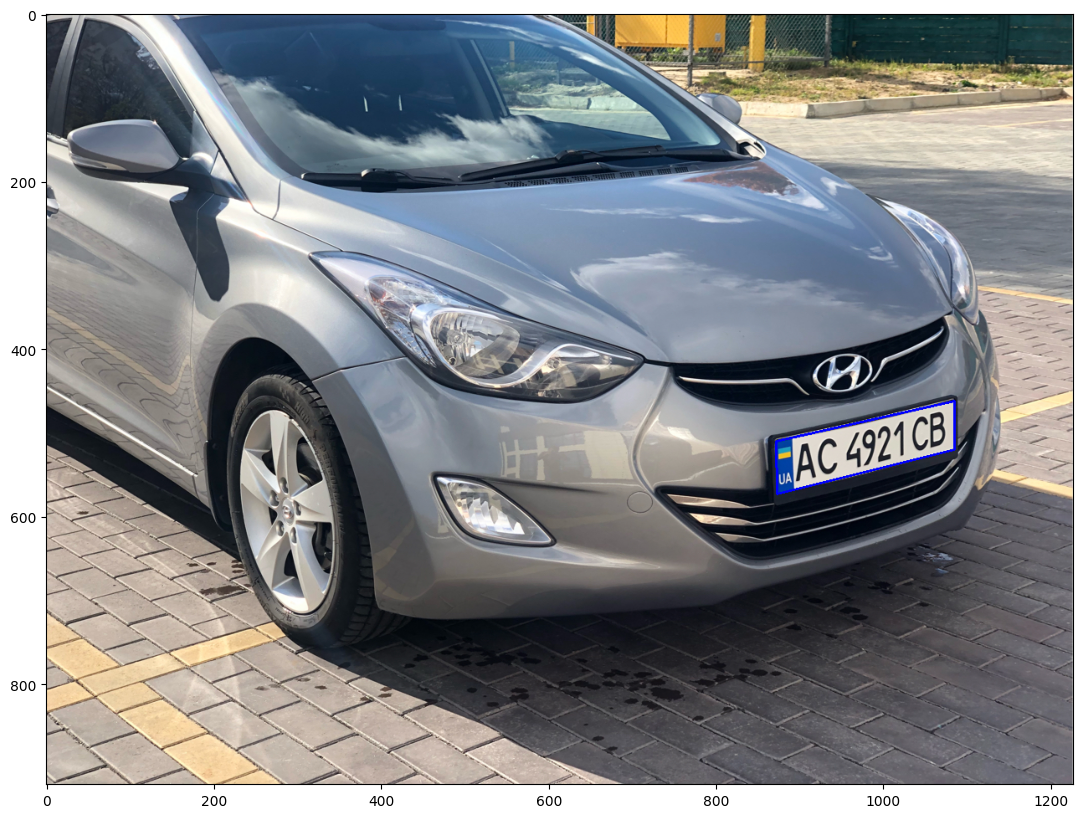

In [6]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)

for img, image_points, image_bboxs in zip(images, images_points, images_bboxs):
    # 1 - brand_numberplate 0 -numberplate
    print(image_bboxs)
    img = img.astype(np.uint8)
    for cntr in image_points:
        cntr = np.array(cntr, dtype=np.int32)
        cv2.drawContours(img, [cntr], -1, (0, 0, 255), 2)
    plt.imshow(img)
    plt.show()